# 1 Data wrangling <a id='_Data_wrangling'></a>

## 1.1 Table of Contents <a id='1.1_Contents'></a>
* [1 Data wrangling](#1_Data_wrangling)
  * [1.1 Table of Contents](#1.1_Contents)
  * [1.2 Introduction & Objective](#1.2_Introduction_&_Objective)
  * [1.3 Imports](#1.3_Imports)
  * [1.4 Load Data](#1.4_Load_Data)
  * [1.5 Explore the Data](#1.5_Explore_the_Data)
    * [1.5.1 Shape of data & Structure](#1.5.1_Shape_data)
    * [1.5.2 General Info, Missing Values, and Duplicates](#1.5.2_General_Info)
    * [1.5.3 Exploring Categorical Variables](#1.5.3_Categorical_Variables)
    * [1.5.4 Exploring Numerical Variables](#1.5.4_Numerical_Variables)
  * [1.6 Data Summary and Highlights](#1.6_Data_Highlights)

## 1.2 Introduction & Objective <a id='1.2_Introduction_&_Objective'></a>

**Problem Statement:**

The goal is to predict obesity risk in individuals from Mexico, Peru, and Colombia, using various factors related to eating habits, physical condition, and demographic information, with the objective of addressing the risk of cardiovascular disease (CVD).

**Context:**

The dataset includes data from individuals aged 14 to 61 from Mexico, Peru, and Colombia, collected through a web platform survey. It consists of attributes such as eating habits (e.g., consumption of high-caloric food, frequency of vegetable consumption), physical condition (e.g., physical activity frequency, transportation used), and demographic variables (gender, age, height, weight). Obesity levels are categorized based on body mass index (BMI), and the dataset provides insights into the relationship between obesity and CVD risk.

**Abbreviation keys:**

**FAVC:** Frequent consumption of high caloric food

**FCVC:** Frequency of consumption of vegetables

**NCP:** Number of main meals

**CAEC:** Consumption of food between meals

**CH20:** Consumption of water daily 

**CALC:** Consumption of alcohol

**SCC:** Calories consumption monitoring

**FAF:** Physical activity frequency

**TUE:** Time using technology devices

**MTRANS:** Transportation used

## 1.3 Imports <a id='1.3_Imports'></a>

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import numpy as np

from library.sb_utils import save_file

## 1.4 Load Data <a id='1.4_Load_Data'></a>

In [2]:
# Reading csv files and dividing them into different variables

train_data = pd.read_csv('/Users/magdalenamasello/Documents/Work/DataScience/Bootcamp/Projects/CapstoneProjectTwo/CapstoneTwo/RawData/train.csv')
test_data = pd.read_csv('/Users/magdalenamasello/Documents/Work/DataScience/Bootcamp/Projects/CapstoneProjectTwo/CapstoneTwo/RawData/test.csv')
submission_data = pd.read_csv('/Users/magdalenamasello/Documents/Work/DataScience/Bootcamp/Projects/CapstoneProjectTwo/CapstoneTwo/RawData/sample_submission.csv')

## 1.5 Explore the Data <a id='1.5_Explore_the_Data'></a>

### 1.5.1 Shape of data & Structure <a id='1.5.1_Shape_data'></a>

In [3]:
# Shape of data
print(f'The Train dataset has {train_data.shape[0]} rows and {train_data.shape[1]} columns')
print(f'The Test dataset has {test_data.shape[0]} rows and {test_data.shape[1]} columns')

The Train dataset has 20758 rows and 18 columns
The Test dataset has 13840 rows and 17 columns


In [4]:
# Call the head method to take a look at train data
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Call the head method to take a look at test data
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


### 1.5.2 General Info, Missing Values, and Duplicates <a id='1.5.2_General_Info'></a>

In [6]:
def custom_summary(df):
    # Initialize an empty DataFrame to store summary information
    summary_df = pd.DataFrame(columns=['Data Type', '# Missing Values', '# Unique Values', 'Min', 'Max', 'Mean', 'Mode/Top Value', 'Top Value Freq', 'Median', 'Std Dev'])
    
    # Loop through each column in the DataFrame
    for column in df.columns:
        # Calculate summary statistics
        dtype = df[column].dtype  # Data type
        missing_values = df[column].isnull().sum()  # Number of missing values
        num_unique = df[column].nunique()  # Number of unique values
        
        if df[column].dtype == 'object':
            min_value = 'nan'  # Minimum value (not applicable for categorical variables)
            max_value = 'nan'  # Maximum value (not applicable for categorical variables)
            mean_value = 'nan'  # Mean (not applicable for categorical variables)
            mode_value = df[column].mode().iloc[0] if num_unique > 1 else df[column].iloc[0]  # Mode for numerical, top value for categorical
            top_value_freq = df[column].value_counts().iloc[0]  # Frequency of top value
            median_value = 'nan'  # Median (not applicable for categorical variables)
            std_dev_value = 'nan'  # Standard deviation (not applicable for categorical variables)
        else:
            min_value = df[column].min()  # Minimum value
            max_value = df[column].max()  # Maximum value
            mean_value = df[column].mean()  # Mean
            mode_value = df[column].mode().iloc[0]  # Mode
            top_value_freq = 'nan'  # Frequency of top value (not applicable for numerical variables)
            median_value = df[column].median()  # Median
            std_dev_value = df[column].std()  # Standard deviation
        
        # Add summary information to the DataFrame
        summary_df.loc[column] = [dtype, missing_values, num_unique, min_value, max_value, mean_value, mode_value, top_value_freq, median_value, std_dev_value]
    
    return summary_df

# Call the custom summary function
summary_table = custom_summary(train_data.drop(columns=["id"]))

# Apply left alignment for text
summary_table_styled = summary_table.style.set_properties(**{'text-align': 'left'})

# Apply left alignment for variable names (column headers)
summary_table_styled.set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}])

,Data Type,# Missing Values,# Unique Values,Min,Max,Mean,Mode/Top Value,Top Value Freq,Median,Std Dev
Gender,object,0,2,nan,nan,nan,Female,10422,nan,nan
Age,float64,0,1703,14.000000,61.000000,23.841804,18.000000,nan,22.815416,5.688072
Height,float64,0,1833,1.450000,1.975663,1.700245,1.700000,nan,1.700000,0.087312
Weight,float64,0,1979,39.000000,165.057269,87.887768,80.000000,nan,84.064875,26.379443
family_history_with_overweight,object,0,2,nan,nan,nan,yes,17014,nan,nan
FAVC,object,0,2,nan,nan,nan,yes,18982,nan,nan
FCVC,float64,0,934,1.000000,3.000000,2.445908,3.000000,nan,2.393837,0.533218
NCP,float64,0,689,1.000000,4.000000,2.761332,3.000000,nan,3.000000,0.705375
CAEC,object,0,4,nan,nan,nan,Sometimes,17529,nan,nan
SMOKE,object,0,2,nan,nan,nan,no,20513,nan,nan


In [7]:
# Check for duplicate rows in the entire Train DataFrame
duplicates = train_data.duplicated()

# Check if there are any duplicate rows
if duplicates.any():
    print("Duplicates found!")
    # Display the duplicate rows
    duplicate_rows = train_data[duplicates]
    print(duplicate_rows)
else:
    print("No duplicates found.")

No duplicates found.


In [8]:
# Check for duplicate rows in the entire Test DataFrame
duplicates_test = test_data.duplicated()

# Check if there are any duplicate rows
if duplicates.any():
    print("Duplicates found!")
    # Display the duplicate rows
    duplicate_rows_test = test_data[duplicates]
    print(duplicate_rows_test)
else:
    print("No duplicates found.")

No duplicates found.


### 1.5.3 Exploring Categorical Variables <a id='1.5.3_Categorical_Variables'></a>

In [9]:
# Identify categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Counts and percents unique values for categorical columns
print("Counts and Percents Unique Values for Categorical Columns:")
for column in categorical_columns:
    unique_counts = train_data[column].value_counts()
    percent_unique = (unique_counts / len(train_data)) * 100
    print(f"Column: {column}")
    print(unique_counts)
    print(percent_unique)
    print()


Counts and Percents Unique Values for Categorical Columns:
Column: Gender
Gender
Female    10422
Male      10336
Name: count, dtype: int64
Gender
Female    50.207149
Male      49.792851
Name: count, dtype: float64

Column: family_history_with_overweight
family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64
family_history_with_overweight
yes    81.96358
no     18.03642
Name: count, dtype: float64

Column: FAVC
FAVC
yes    18982
no      1776
Name: count, dtype: int64
FAVC
yes    91.444262
no      8.555738
Name: count, dtype: float64

Column: CAEC
CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64
CAEC
Sometimes     84.444551
Frequently    11.908662
Always         2.302727
no             1.344060
Name: count, dtype: float64

Column: SMOKE
SMOKE
no     20513
yes      245
Name: count, dtype: int64
SMOKE
no     98.819732
yes     1.180268
Name: count, dtype: float64

Column: SCC
SCC
no     20071
yes      

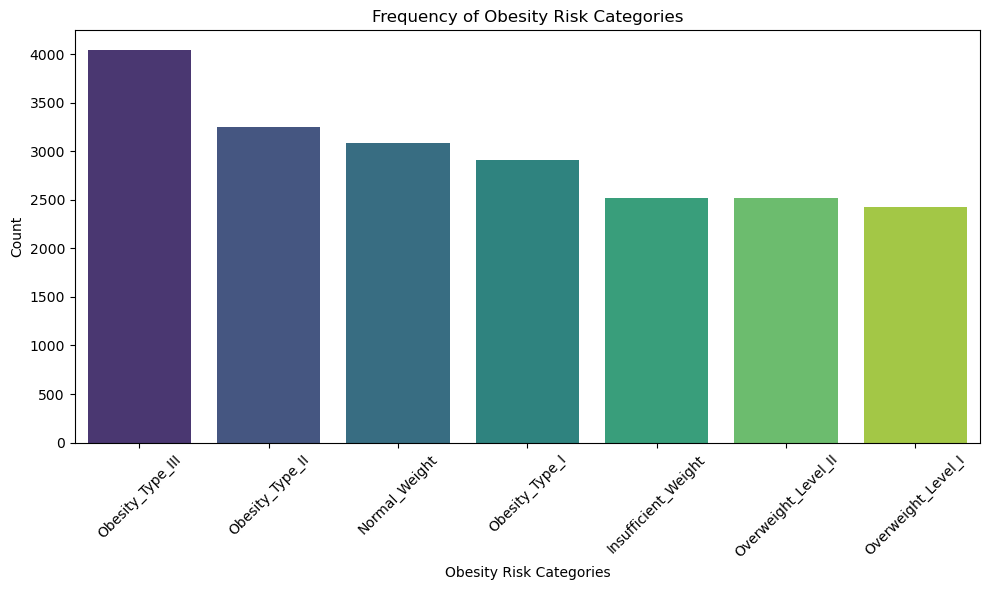

In [10]:
# Calculate the frequency of each category in the 'NObeyesdad' column
obesity_counts = train_data['NObeyesdad'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=obesity_counts.index, y=obesity_counts.values, palette="viridis")

# Add labels and title
plt.title('Frequency of Obesity Risk Categories')
plt.xlabel('Obesity Risk Categories')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

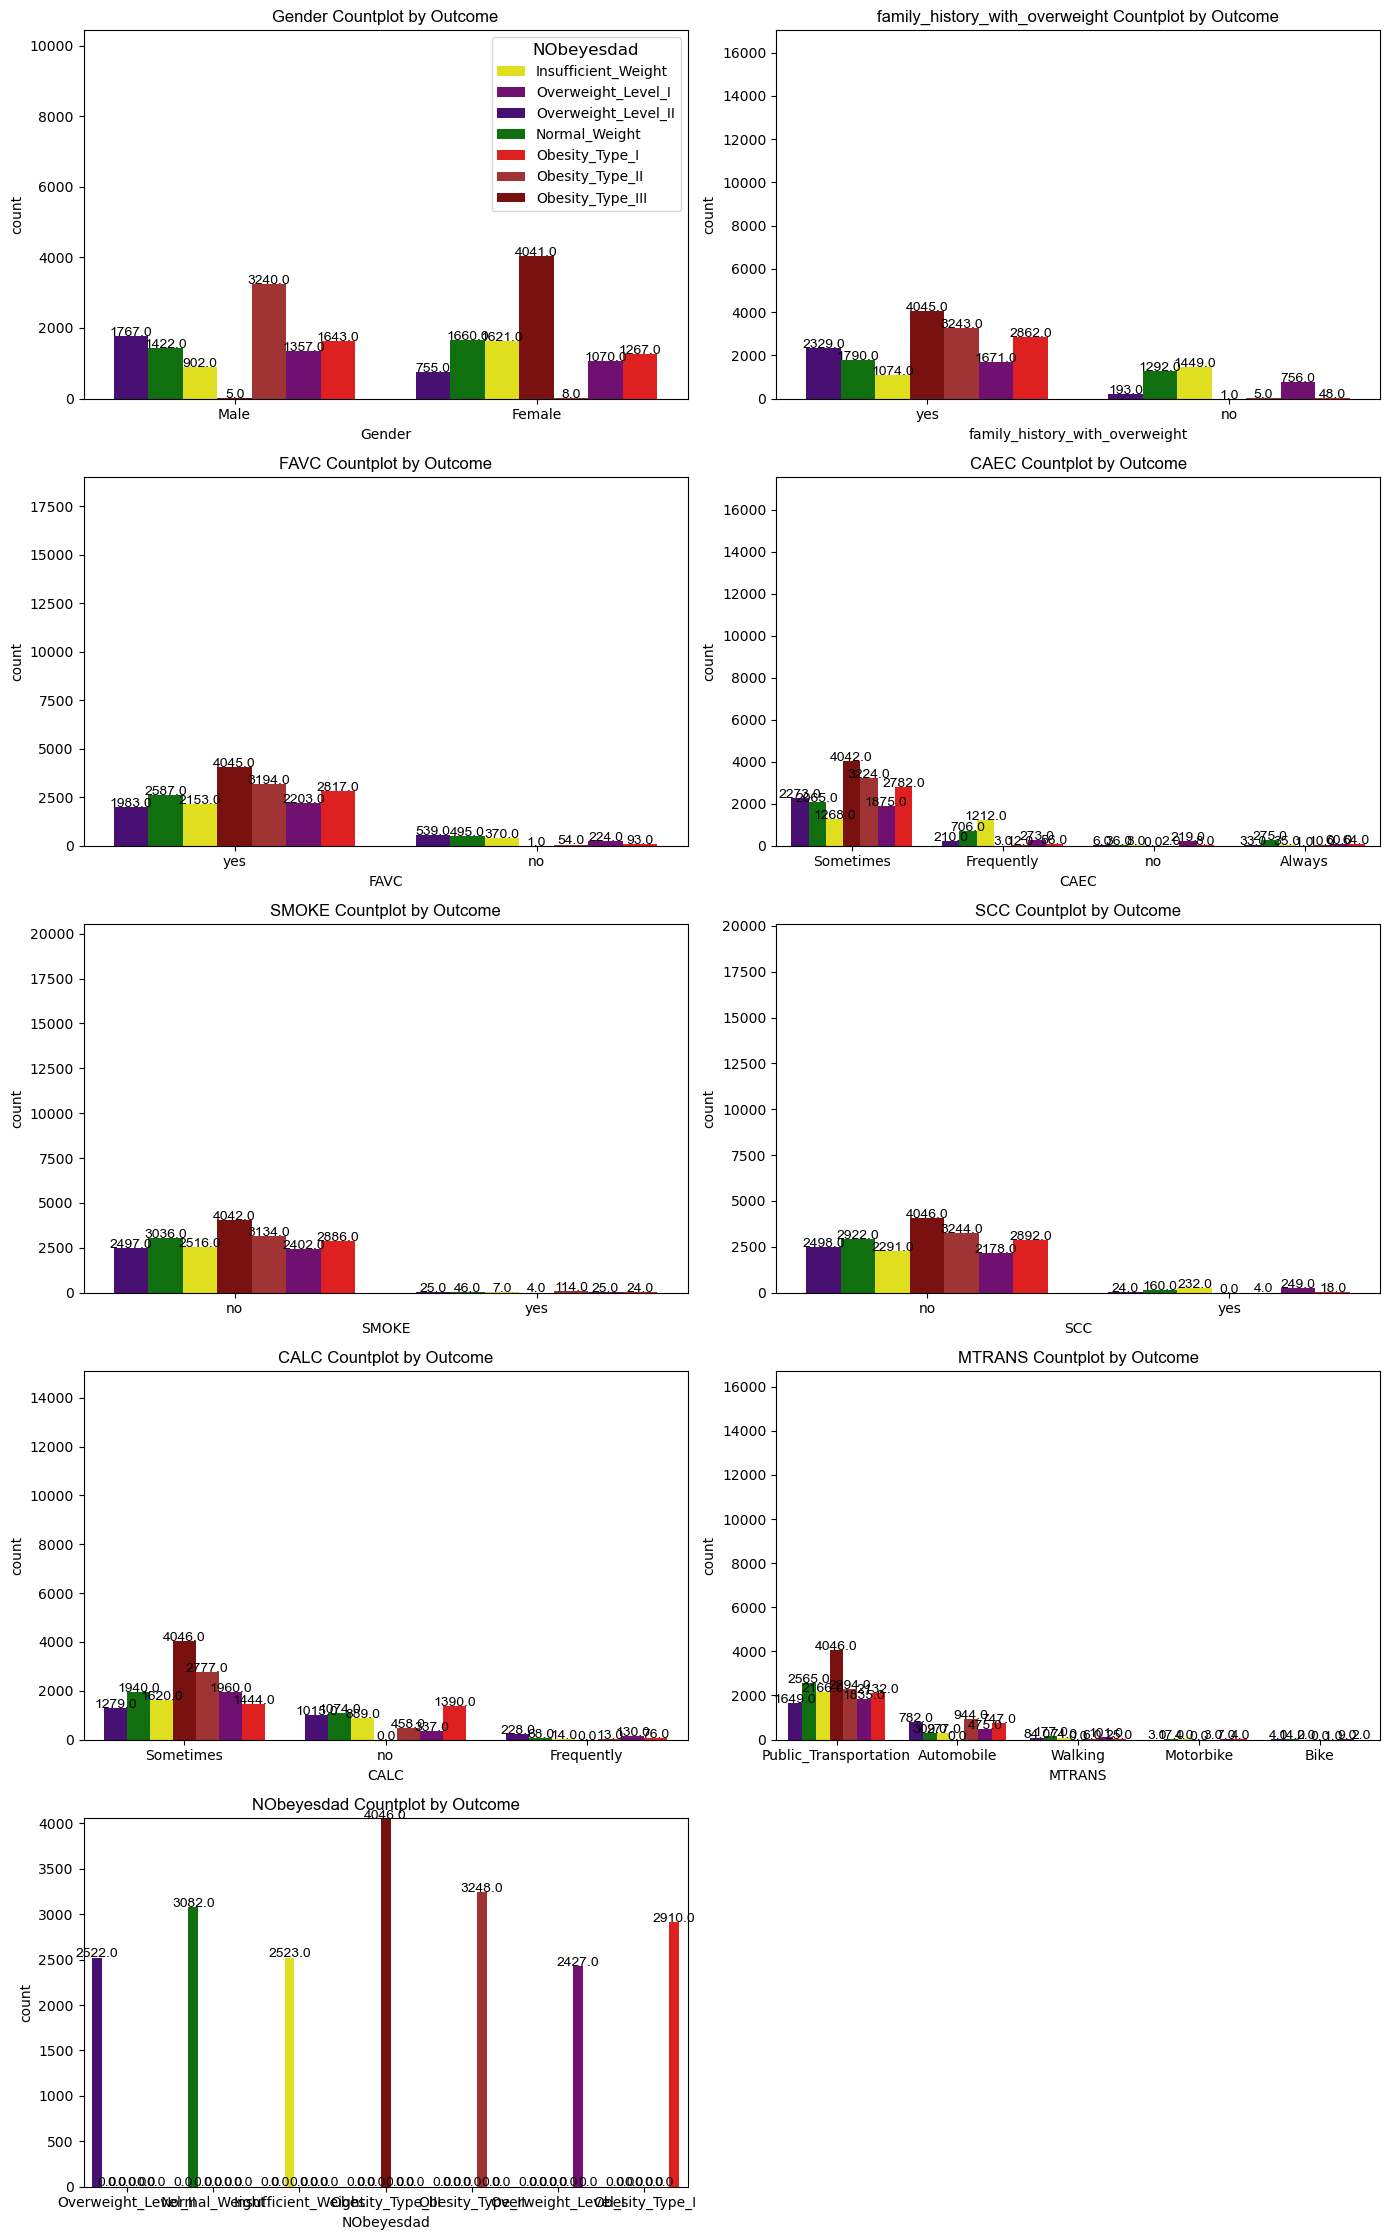

In [25]:
# Define custom colors for each category
custom_palette = {
    'Insufficient_Weight': '#FFFF00',  # Yellow
    'Overweight_Level_I': '#800080',   # Purple
    'Overweight_Level_II': '#4B0082',  # Darker shade of purple
    'Normal_Weight': '#008000',        # Green
    'Obesity_Type_I': '#FF0000',       # Red
    'Obesity_Type_II': '#B22222',      # Darker shade of red
    'Obesity_Type_III': '#8B0000'      # Darkest shade of red
}

# Define the order of legend labels
legend_order = ['Insufficient_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight',
                'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Create a figure with a specific size
plt.figure(figsize=(14, len(categorical_columns)*2.5))

# Loop through each categorical column
for idx, column in enumerate(categorical_columns):
    # Create subplots
    plt.subplot(len(categorical_columns)//2 + len(categorical_columns) % 2, 2, idx+1)
    
    # Create countplot using seaborn's countplot function with custom palette
    ax = sns.countplot(x=column, data=train_data, hue='NObeyesdad', palette=custom_palette)
    
    # Add title to the plot with custom font
    plt.title(f"{column} Countplot by Outcome", **custom_font)
    
    # Set y-axis limit
    plt.ylim(0, train_data[column].value_counts().max() + 10)
    
    # Add text labels for each bar
    for p in ax.patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width()/2., height + 2, height, ha="center", **custom_font)
    
    # Remove duplicate legend
    if idx != 0:
        ax.get_legend().remove()
    else:
        # Order the legend according to the specified order
        handles, labels = ax.get_legend_handles_labels()
        handles = [handles[labels.index(label)] for label in legend_order]
        ax.legend(handles, legend_order, title='NObeyesdad', title_fontsize='large')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [29]:
# List of categorical variables (excluding the target variable)
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Calculate the percentage of each category within each obesity type for all categorical variables
percentage_tables = {}
for column in categorical_columns:
    percentage_table = (train_data.groupby(['NObeyesdad', column]).size() / 
                        train_data.groupby('NObeyesdad').size() * 100).unstack()
    percentage_table = percentage_table.round(2)
    percentage_tables[column] = percentage_table

# Display the tables
for column, table in percentage_tables.items():
    print(f"Percentage of Each Category Within Each Obesity Type for '{column}':")
    print(table)
    print("\n")

Percentage of Each Category Within Each Obesity Type for 'Gender':
Gender               Female   Male
NObeyesdad                        
Insufficient_Weight   64.25  35.75
Normal_Weight         53.86  46.14
Obesity_Type_I        43.54  56.46
Obesity_Type_II        0.25  99.75
Obesity_Type_III      99.88   0.12
Overweight_Level_I    44.09  55.91
Overweight_Level_II   29.94  70.06


Percentage of Each Category Within Each Obesity Type for 'family_history_with_overweight':
family_history_with_overweight     no    yes
NObeyesdad                                  
Insufficient_Weight             57.43  42.57
Normal_Weight                   41.92  58.08
Obesity_Type_I                   1.65  98.35
Obesity_Type_II                  0.15  99.85
Obesity_Type_III                 0.02  99.98
Overweight_Level_I              31.15  68.85
Overweight_Level_II              7.65  92.35


Percentage of Each Category Within Each Obesity Type for 'FAVC':
FAVC                    no    yes
NObeyesdad         

In [31]:
# List of categorical variables (excluding the target variable)
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Calculate the percentage of each obesity category within each category of each categorical variable
inverse_percentage_tables = {}
for column in categorical_columns:
    inverse_percentage_table = (train_data.groupby([column, 'NObeyesdad']).size() / 
                                train_data.groupby(column).size() * 100).unstack()
    inverse_percentage_table = inverse_percentage_table.round(2)
    inverse_percentage_tables[column] = inverse_percentage_table

# Display the styled tables
for column, table in inverse_percentage_tables.items():
    print(f"Percentage of Each Obesity Category Within Each Category of '{column}':")
    styled_table = table.style.background_gradient(cmap='Blues')
    styled_table = styled_table.set_caption(f"{column} Categories")
    display(styled_table)
    print("\n")

Percentage of Each Obesity Category Within Each Category of 'Gender':


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Gender,,,,,,,
Female,15.550000,15.930000,12.160000,0.080000,38.770000,10.270000,7.240000
Male,8.730000,13.760000,15.900000,31.350000,0.050000,13.130000,17.100000




Percentage of Each Obesity Category Within Each Category of 'family_history_with_overweight':


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
family_history_with_overweight,,,,,,,
no,38.700000,34.510000,1.280000,0.130000,0.030000,20.190000,5.150000
yes,6.310000,10.520000,16.820000,19.060000,23.770000,9.820000,13.690000




Percentage of Each Obesity Category Within Each Category of 'FAVC':


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FAVC,,,,,,,
no,20.830000,27.870000,5.240000,3.040000,0.060000,12.610000,30.350000
yes,11.340000,13.630000,14.840000,16.830000,21.310000,11.610000,10.450000




Percentage of Each Obesity Category Within Each Category of 'CAEC':


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CAEC,,,,,,,
Always,7.320000,57.530000,13.390000,2.090000,0.210000,12.550000,6.900000
Frequently,49.030000,28.560000,2.270000,0.490000,0.120000,11.040000,8.500000
Sometimes,7.230000,11.780000,15.870000,18.390000,23.060000,10.700000,12.970000
no,2.870000,12.900000,2.870000,0.720000,nan,78.490000,2.150000




Percentage of Each Obesity Category Within Each Category of 'SMOKE':


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
SMOKE,,,,,,,
no,12.270000,14.800000,14.070000,15.280000,19.700000,11.710000,12.170000
yes,2.860000,18.780000,9.800000,46.530000,1.630000,10.200000,10.200000




Percentage of Each Obesity Category Within Each Category of 'SCC':


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
SCC,,,,,,,
no,11.410000,14.560000,14.410000,16.160000,20.160000,10.850000,12.450000
yes,33.770000,23.290000,2.620000,0.580000,nan,36.240000,3.490000




Percentage of Each Obesity Category Within Each Category of 'CALC':


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CALC,,,,,,,
Frequently,2.650000,12.850000,14.370000,2.460000,nan,24.570000,43.100000
Sometimes,10.750000,12.880000,9.580000,18.430000,26.860000,13.010000,8.490000
no,17.220000,20.800000,26.920000,8.870000,nan,6.530000,19.660000




Percentage of Each Obesity Category Within Each Category of 'MTRANS':


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
MTRANS,,,,,,,
Automobile,7.840000,8.740000,21.140000,26.710000,nan,13.440000,22.130000
Bike,6.250000,43.750000,6.250000,3.120000,nan,28.120000,12.500000
Motorbike,10.530000,44.740000,10.530000,7.890000,nan,18.420000,7.890000
Public_Transportation,12.980000,15.370000,12.780000,13.750000,24.250000,11.000000,9.880000
Walking,15.850000,37.900000,5.350000,1.280000,nan,21.630000,17.990000


### 1.5.4 Exploring Numerical Variables <a id='1.5.3_Numerical_Variables'></a>

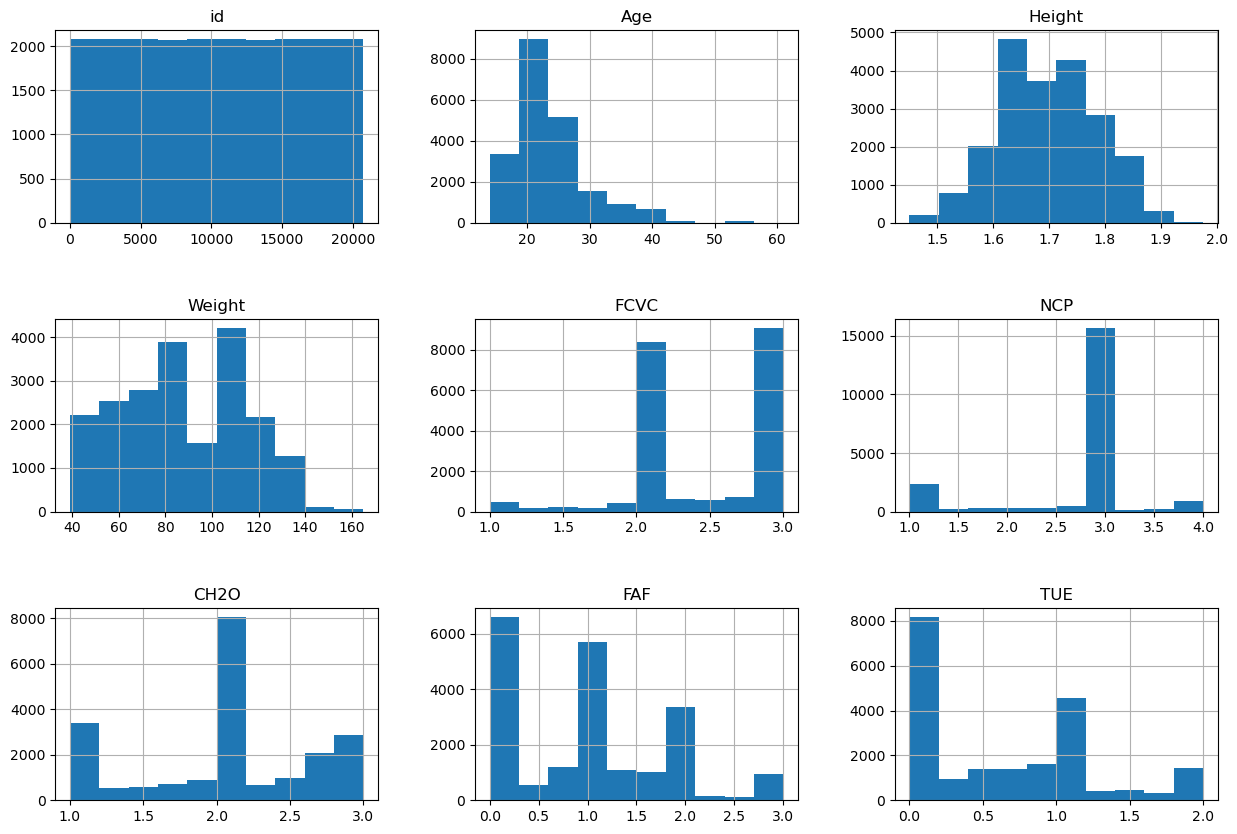

In [12]:
# Call train_data's `hist` method to plot histograms of each of the numeric features
train_data.hist(figsize=(15,10))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

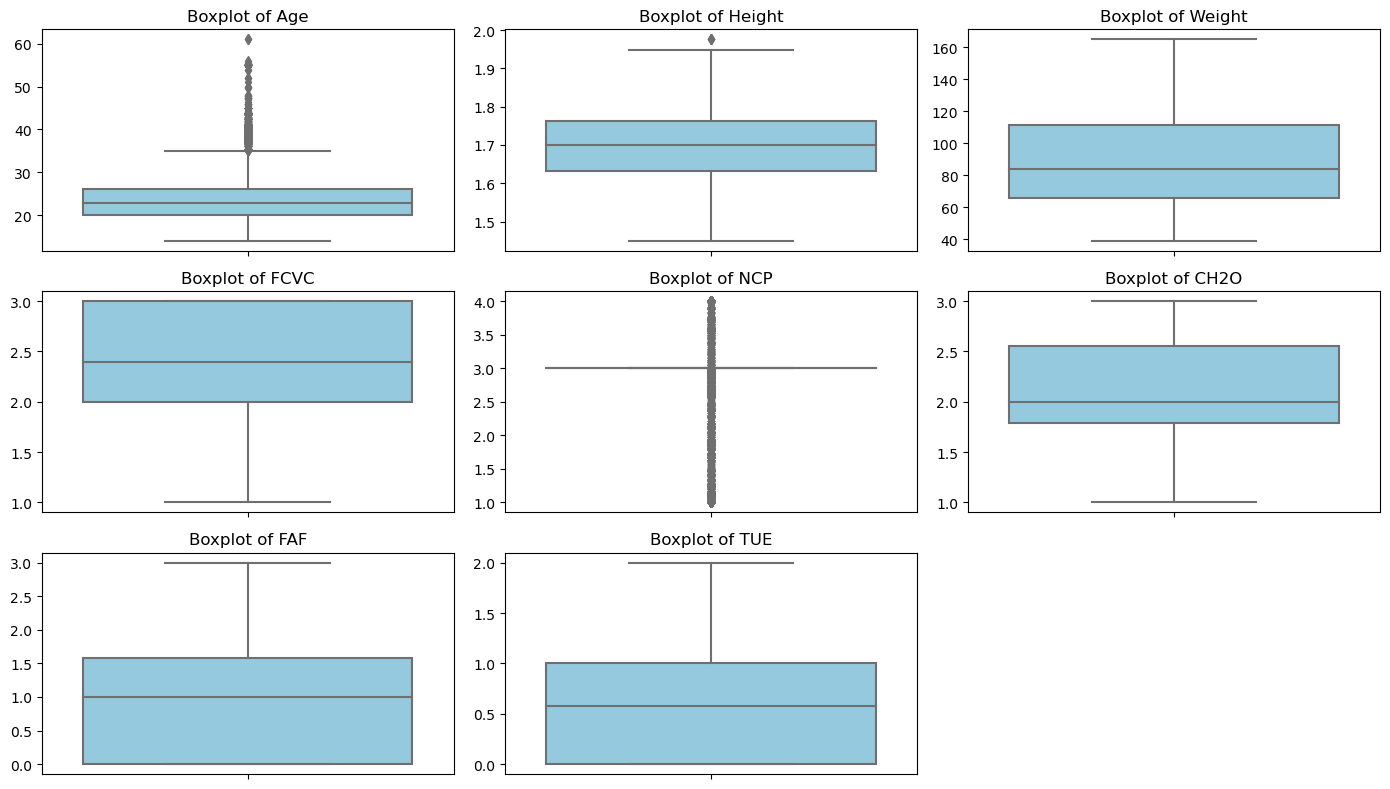

In [34]:
# Select continuous variables
continuous_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Set up the figure size and layout
plt.figure(figsize=(14, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Loop through each continuous variable and create a boxplot
for i, var in enumerate(continuous_vars):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=train_data[var], color='skyblue')
    plt.title(f'Boxplot of {var}')
    plt.ylabel('')
    plt.xlabel('')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

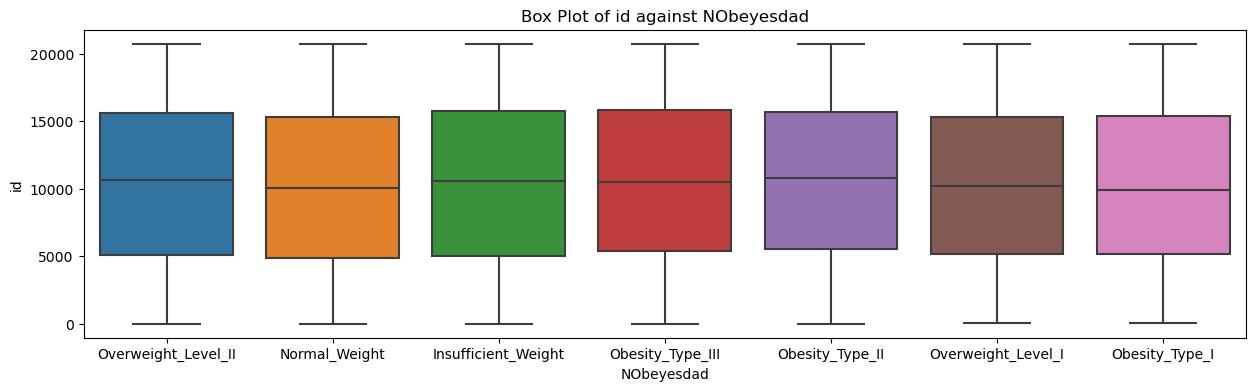

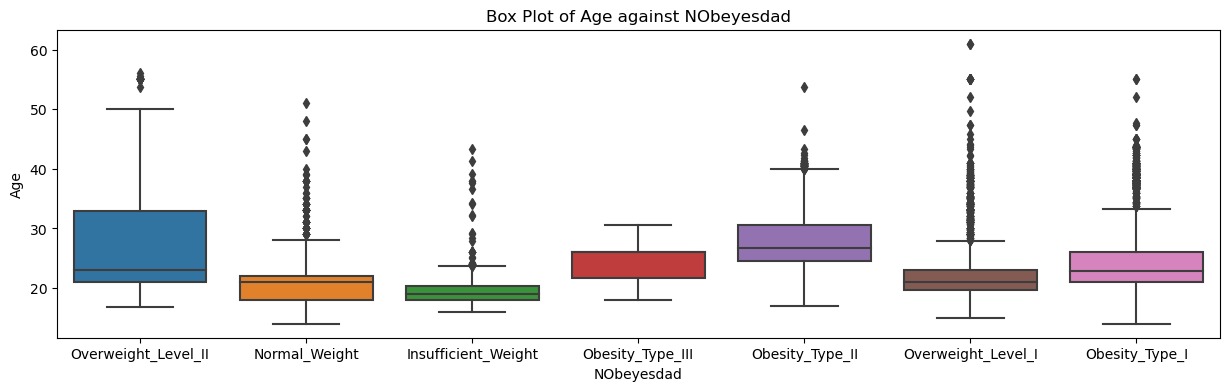

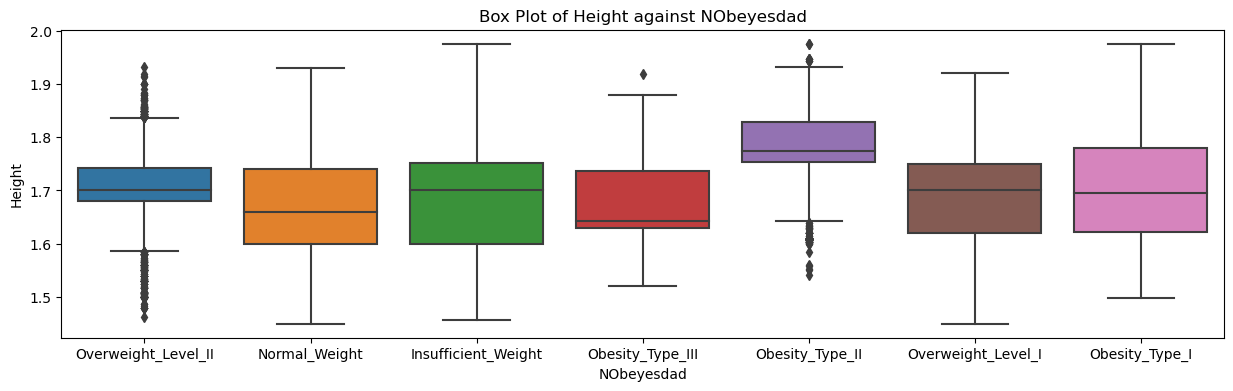

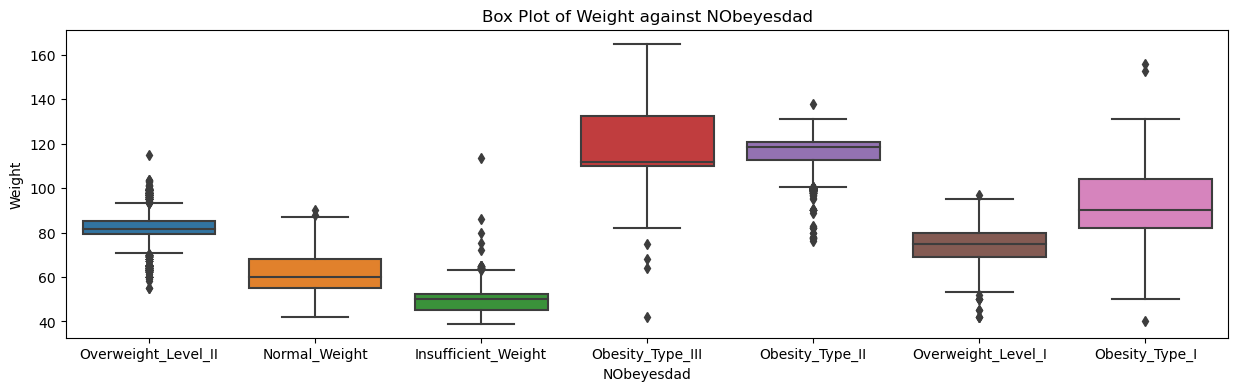

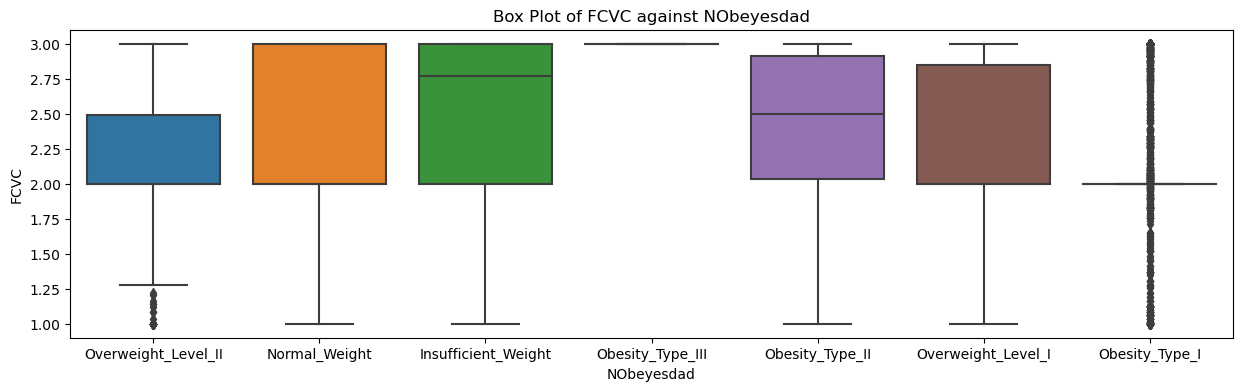

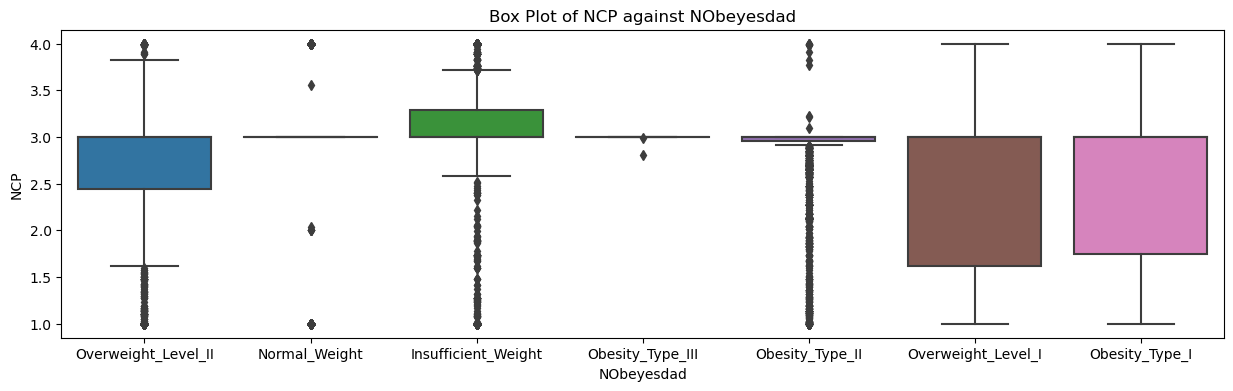

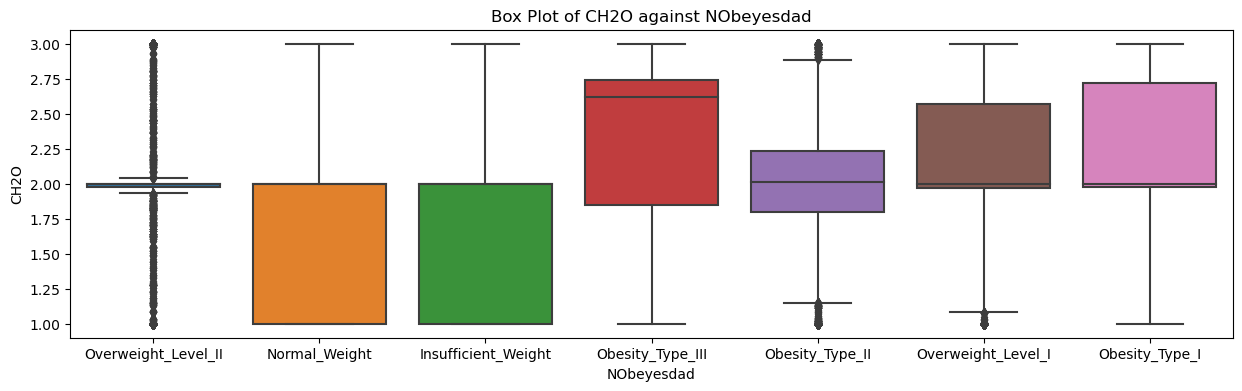

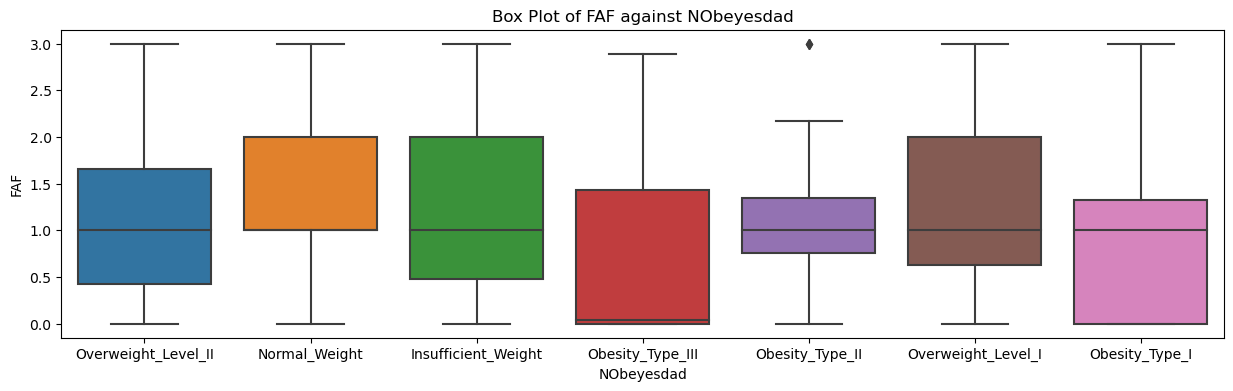

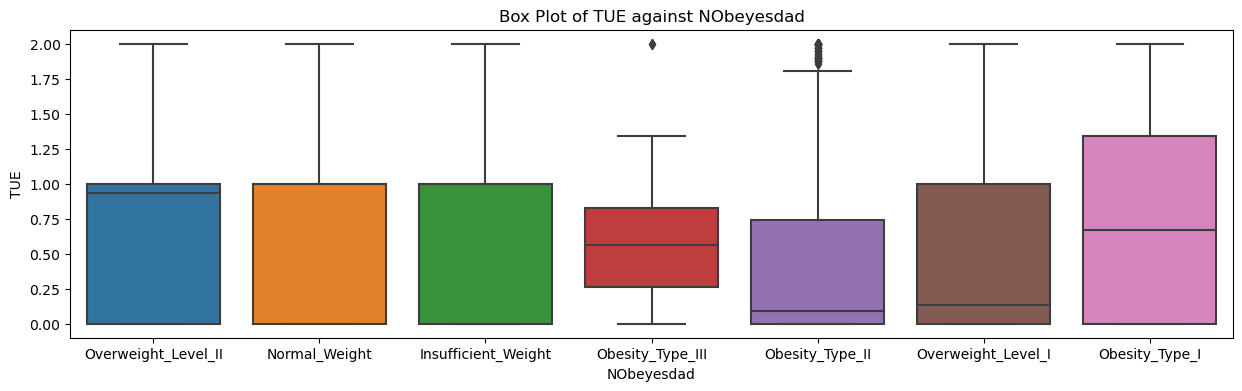

In [14]:
# Select numerical features from train_data
numerical_feats = train_data.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numerical feature
for feature in numerical_feats:
    # Create a figure with a specific size
    plt.figure(figsize=(15, 4))
    
    # Create a box plot using seaborn's boxplot function
    sns.boxplot(x='NObeyesdad', y=feature, data=train_data)
    
    # Add a title to the plot
    plt.title(f'Box Plot of {feature} against NObeyesdad')
    
    # Show the plot
    plt.show()


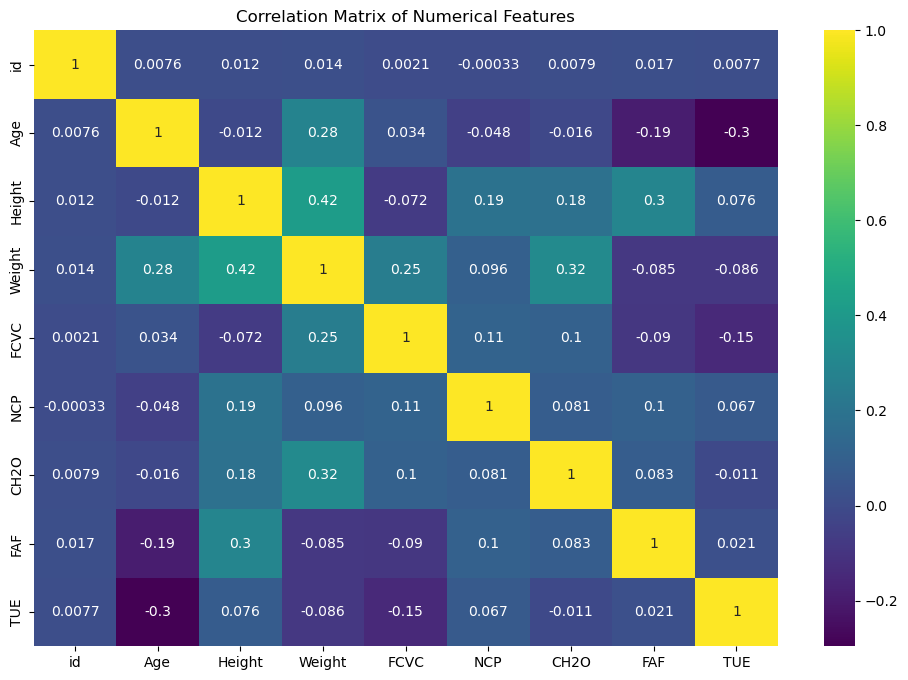

In [15]:
# Calculate the correlation matrix
corr_matrix = train_data[numerical_feats].corr()

# Create a figure with a specific size
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn's heatmap function
sns.heatmap(corr_matrix, annot=True, cmap='viridis')

# Add a title to the plot
plt.title('Correlation Matrix of Numerical Features')

# Show the plot
plt.show()

In [32]:
# Calculate BMI
train_data['BMI'] = train_data['Weight'] / (train_data['Height'] ** 2)

# Display the first few rows of the DataFrame to verify the new column
print(train_data.head())

   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad        BMI  


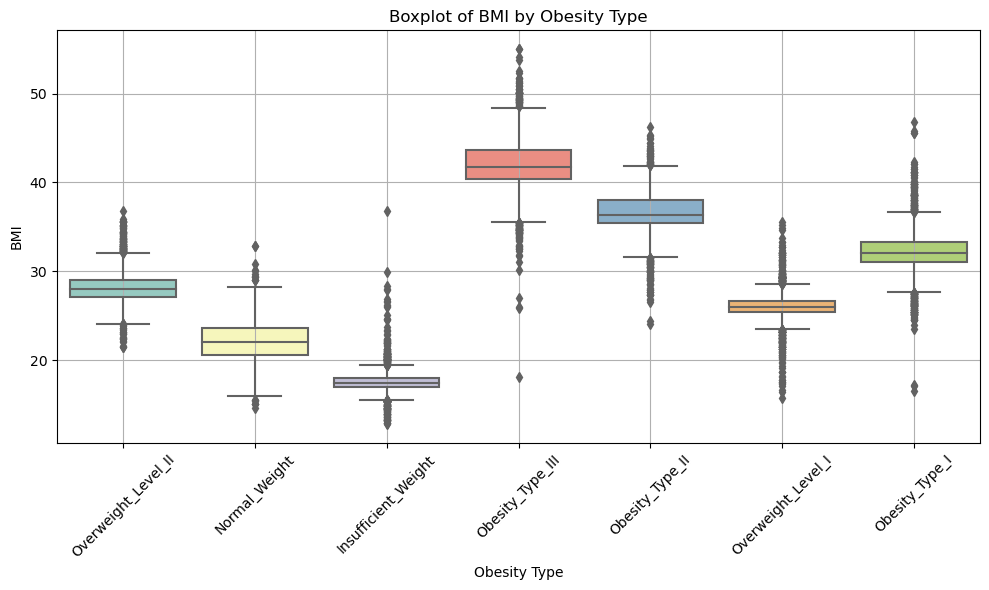

In [33]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad', y='BMI', data=train_data, palette='Set3')
plt.title('Boxplot of BMI by Obesity Type')
plt.xlabel('Obesity Type')
plt.ylabel('BMI')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

## 1.6 Data Summary and Highlights <a id='1.6_Data_Highlights'></a>

• All categorical variables seem to have very few unique values, which may simplify future analysis.  
• There are **no missing or duplicate values** in any of the columns. Overall the data seems clean and does not present any major concerns. Ranges for numerical variables seem to be logical. Age seems to have outliers, but there are many and no real reason to remove them just yet. \
• Gender seems to be equally distributed in the data set. On the other hand, most individuals have a family history of being overweight, frequently consume high-caloric food, are non-smokers, do not monitor calorie consumption, and use some form of transportation.\
• Overall, the most common Obesity type is III.\
• Obesity Type III is most common among Females, while Obesity Type II is most common among Males.\
• Having a family history of overweight seems to be a strong indicator of overweight and obesity. On the other hand, smokers seem to have a lower probability of being overweight and obese.  
• Age, height, and weight are normally distributed with minor skewness.\
• Normal or insufficient-weight individuals seem to be younger, on average, than their overweight/obese counterparts.\
• When looking at BMI, it is interesting to see how much variability there's between obesity types, since according to the data description, the categories were built according to BMI. For instance, there are Obese Type III individuals with very low BMI. Ideally, we'll reach out to the individuals responsible for collecting and processing this data to better understand why could this be.